## Data Analysis of Kaggle's KDD Cup 2014 
## "Predicting Excitement at DonorsChoose.org"

## 1. Exploratory analysis

In [1]:
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import datetime as dt
%matplotlib inline

In [2]:
sns.set(style="darkgrid")

In [3]:
donations = pd.read_csv("donations.csv")
projects = pd.read_csv('projects.csv')
outcomes = pd.read_csv('outcomes.csv')

In [4]:
donations.head()

,donationid,projectid,donor_acctid,donor_city,donor_state,donor_zip,is_teacher_acct,donation_timestamp,donation_to_project,donation_optional_support,...,dollar_amount,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,donation_message
0,431d720bc3dfd75ae445a5eaa0b0638d,ffffac55ee02a49d1abc87ba6fc61135,22cbc920c9b5fa08dfb331422f5926b5,Peachtree City,GA,30269.0,f,2011-08-25 14:27:34.807,42.50,7.50,...,10_to_100,t,no_cash_received,f,t,f,f,f,f,I gave to this project because I support the e...
1,fcfedba1c8a0ba77d280cace80a909f6,ffffac55ee02a49d1abc87ba6fc61135,521f1830a77c9dbbf8119d99c6206a16,NaN,GA,NaN,f,2011-11-04 07:54:21.552,26.83,4.73,...,10_to_100,t,creditcard,f,t,f,f,f,f,I donated because I want to support kids in Ge...
2,3fa95d29986aa6f401c6719ced3a3ce7,ffffac55ee02a49d1abc87ba6fc61135,1e0a63fc8141c7ba26b8b44ca0871b90,Rockville,MD,20853.0,f,2011-11-02 22:53:53.019,55.35,0.00,...,10_to_100,f,no_cash_received,t,f,f,f,t,f,The Spark's 'pet' projects include those which...
3,020ad6bd5e88a35741d23b5e08f8b8e8,ffffac55ee02a49d1abc87ba6fc61135,1d4acb508df29d5f1cc6d382969576cb,Salem,IN,47167.0,f,2011-11-03 23:54:01.109,8.50,1.50,...,10_to_100,t,paypal,f,f,f,f,f,f,I gave to this project because Education is im...
4,4b44b03f304d6425ae94446686f93cd6,ffffac55ee02a49d1abc87ba6fc61135,59c3c3cfcccc53ae855f7eee911c478b,anonymous,NaN,0.0,f,2011-11-02 23:21:00.043,20.00,0.00,...,10_to_100,f,no_cash_received,f,f,t,f,t,f,I lent a paw to help the children in this clas...


In [5]:
projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


In [6]:
outcomes.head()

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
4,ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.0,6.0,2.0


In [7]:
df = pd.merge(donations, projects, how='outer', on='projectid')

In [8]:
df = pd.merge(df, outcomes, how = 'outer', on='projectid')

In [9]:
df.describe()

,donor_zip,donation_to_project,donation_optional_support,donation_total,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
count,1.385927e+06,3.097989e+06,3.097989e+06,3.097989e+06,3.018875e+06,3.237045e+06,3.237045e+06,3.237030e+06,3.173568e+06,3.237045e+06,3.237045e+06,3.236105e+06,2.902385e+06,3.097694e+06,3.097694e+06
mean,5.066494e+04,6.594590e+01,1.073131e+01,7.667691e+01,2.485626e+11,3.721308e+01,-9.481003e+01,5.475917e+04,2.917683e+01,6.805747e+02,8.078755e+02,9.572429e+01,5.481357e+01,2.271035e+00,1.114400e+01
std,3.331468e+04,2.379026e+02,3.688343e+01,2.704941e+02,1.628295e+11,4.847587e+00,1.837168e+01,3.169115e+04,8.058385e+00,9.262509e+03,1.128654e+04,1.254999e+03,2.849789e+01,5.481081e+00,1.466710e+01
min,0.000000e+00,-1.275000e+01,-2.250000e+00,-1.500000e+01,1.000050e+10,1.824914e+01,-1.766350e+02,4.100000e+02,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000300e+04,1.000000e+01,1.500000e+00,1.000000e+01,6.358101e+10,3.402285e+01,-1.178176e+02,2.811000e+04,3.000000e+01,3.100800e+02,3.672400e+02,2.200000e+01,3.600000e+01,0.000000e+00,3.000000e+00
50%,4.671400e+04,2.125000e+01,3.750000e+00,2.500000e+01,2.400060e+11,3.755370e+01,-8.795355e+01,5.537900e+04,3.000000e+01,4.428100e+02,5.243900e+02,3.000000e+01,5.500000e+01,0.000000e+00,6.000000e+00
75%,8.952100e+04,5.000000e+01,7.500000e+00,5.611000e+01,3.703270e+11,4.076517e+01,-8.002053e+01,9.001700e+04,3.500000e+01,6.574800e+02,7.778000e+02,1.000000e+02,7.500000e+01,3.000000e+00,1.300000e+01
max,9.999900e+04,1.472040e+05,2.199600e+04,1.692000e+05,6.100009e+11,6.725816e+01,-6.662804e+01,9.995000e+04,3.500000e+01,1.025002e+07,1.250002e+07,9.999990e+05,1.000000e+02,1.510000e+02,3.040000e+02


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3237045 entries, 0 to 3237044
Data columns (total 66 columns):
donationid                                        object
projectid                                         object
donor_acctid                                      object
donor_city                                        object
donor_state                                       object
donor_zip                                         float64
is_teacher_acct                                   object
donation_timestamp                                object
donation_to_project                               float64
donation_optional_support                         float64
donation_total                                    float64
dollar_amount                                     object
donation_included_optional_support                object
payment_method                                    object
payment_included_acct_credit                      object
payment_included_campaign_gi

In [11]:
for_reference = ['donationid','projectid','donor_acctid','donor_state','donor_city','donor_zip','teacher_acctid',\
                'schoolid','school_ncesid','school_latitude','school_longitude','school_state','school_city','school_zip',\
                'school_county','school_district','donation_timestamp','donation_message','date_posted']

In [12]:
numeric_var = [x for x in list(df.describe().columns) if x not in for_reference]

In [13]:
numeric_var

['donation_to_project',
 'donation_optional_support',
 'donation_total',
 'fulfillment_labor_materials',
 'total_price_excluding_optional_support',
 'total_price_including_optional_support',
 'students_reached',
 'great_messages_proportion',
 'teacher_referred_count',
 'non_teacher_referred_count']

In [14]:
categorical_var = [x for x in list(df.columns) if x not in numeric_var and x not in for_reference]

In [15]:
categorical_var

['is_teacher_acct',
 'dollar_amount',
 'donation_included_optional_support',
 'payment_method',
 'payment_included_acct_credit',
 'payment_included_campaign_gift_card',
 'payment_included_web_purchased_gift_card',
 'payment_was_promo_matched',
 'via_giving_page',
 'for_honoree',
 'school_metro',
 'school_charter',
 'school_magnet',
 'school_year_round',
 'school_nlns',
 'school_kipp',
 'school_charter_ready_promise',
 'teacher_prefix',
 'teacher_teach_for_america',
 'teacher_ny_teaching_fellow',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'poverty_level',
 'grade_level',
 'eligible_double_your_impact_match',
 'eligible_almost_home_match',
 'is_exciting',
 'at_least_1_teacher_referred_donor',
 'fully_funded',
 'at_least_1_green_donation',
 'great_chat',
 'three_or_more_non_teacher_referred_donors',
 'one_non_teacher_referred_donor_giving_100_plus',
 'donation_from_thoughtful_donor']

### Plot continuous variables

In [17]:
def mathlog(x):
    if x > 0:
        return math.log(x)
    else:
        return None

In [16]:
def plot_continuous_var(name):
    des = df[name].describe()
    print(des)
    if des.max() - des.median() > 20 * des.median():
        col = df[name].apply(mathlog).dropna()
        sns.distplot(col)
        plt.xlabel('log '+name)
    else:
        col = df[name].dropna()
        sns.distplot(col)
    plt.ylabel('Percentage')
    plt.show()

count    3.097989e+06
mean     6.594590e+01
std      2.379026e+02
min     -1.275000e+01
25%      1.000000e+01
50%      2.125000e+01
75%      5.000000e+01
max      1.472040e+05
Name: donation_to_project, dtype: float64


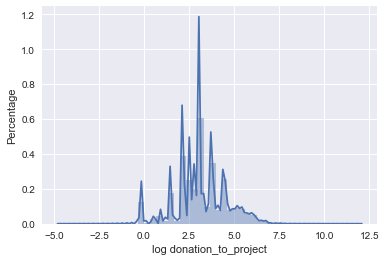

count    3.097989e+06
mean     1.073131e+01
std      3.688343e+01
min     -2.250000e+00
25%      1.500000e+00
50%      3.750000e+00
75%      7.500000e+00
max      2.199600e+04
Name: donation_optional_support, dtype: float64


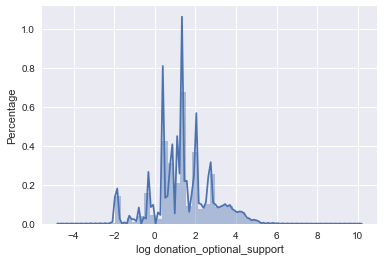

count    3.097989e+06
mean     7.667691e+01
std      2.704941e+02
min     -1.500000e+01
25%      1.000000e+01
50%      2.500000e+01
75%      5.611000e+01
max      1.692000e+05
Name: donation_total, dtype: float64


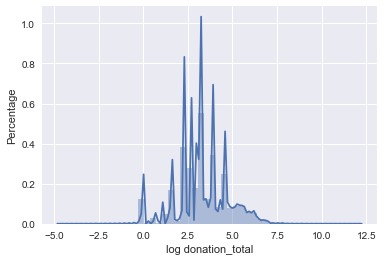

count    3.173568e+06
mean     2.917683e+01
std      8.058385e+00
min      9.000000e+00
25%      3.000000e+01
50%      3.000000e+01
75%      3.500000e+01
max      3.500000e+01
Name: fulfillment_labor_materials, dtype: float64


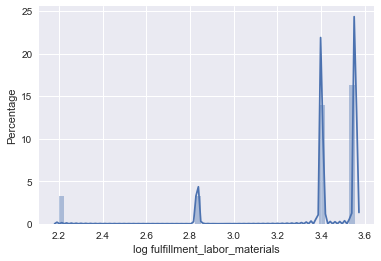

count    3.237045e+06
mean     6.805747e+02
std      9.262509e+03
min      0.000000e+00
25%      3.100800e+02
50%      4.428100e+02
75%      6.574800e+02
max      1.025002e+07
Name: total_price_excluding_optional_support, dtype: float64


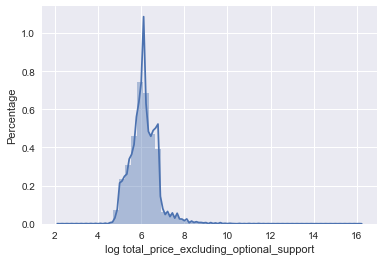

count    3.237045e+06
mean     8.078755e+02
std      1.128654e+04
min      0.000000e+00
25%      3.672400e+02
50%      5.243900e+02
75%      7.778000e+02
max      1.250002e+07
Name: total_price_including_optional_support, dtype: float64


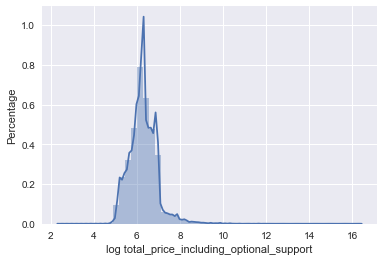

count    3.236105e+06
mean     9.572429e+01
std      1.254999e+03
min      0.000000e+00
25%      2.200000e+01
50%      3.000000e+01
75%      1.000000e+02
max      9.999990e+05
Name: students_reached, dtype: float64


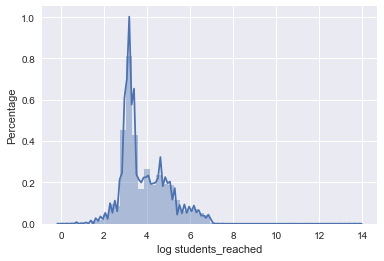

count    2.902385e+06
mean     5.481357e+01
std      2.849789e+01
min      0.000000e+00
25%      3.600000e+01
50%      5.500000e+01
75%      7.500000e+01
max      1.000000e+02
Name: great_messages_proportion, dtype: float64


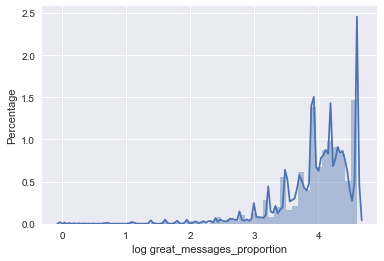

count    3.097694e+06
mean     2.271035e+00
std      5.481081e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      1.510000e+02
Name: teacher_referred_count, dtype: float64


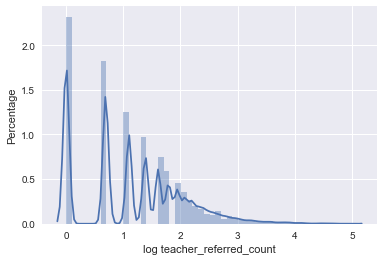

count    3.097694e+06
mean     1.114400e+01
std      1.466710e+01
min      0.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.300000e+01
max      3.040000e+02
Name: non_teacher_referred_count, dtype: float64


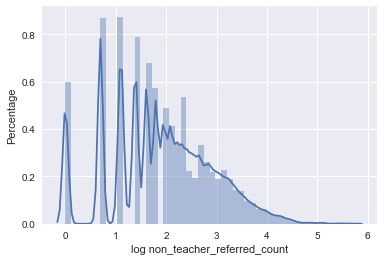

In [18]:
# relationships between'is_exciting' and numeric variables
for name in numeric_var:
    plot_continuous_var(name)

### Plot categorical variables

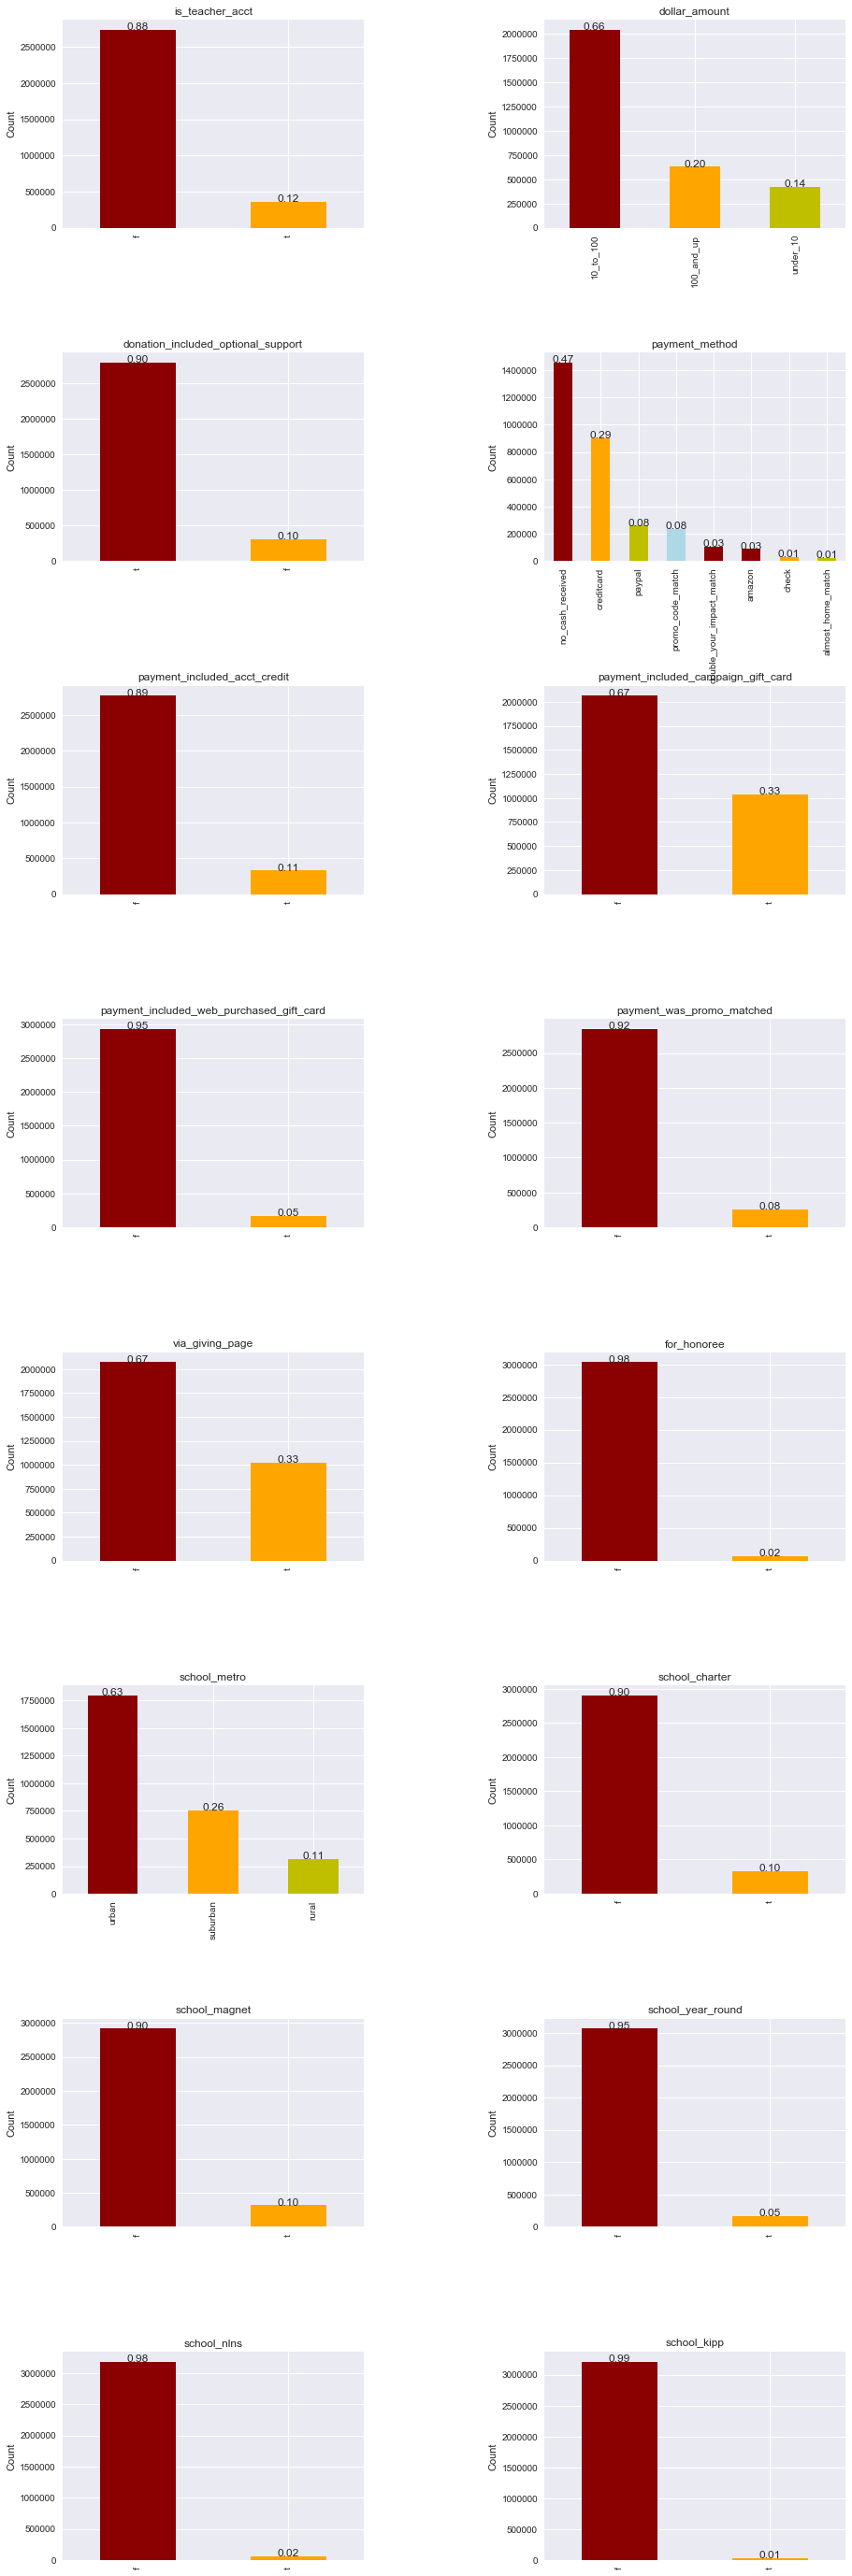

In [36]:
fig, axs = plt.subplots(ncols=2,nrows=8, figsize=(15,50))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
for i in range(8):
    for j in range(2):
        if i*2+j < len(categorical_var):
            name = categorical_var[i*2+j]
            ax1 = df[name].value_counts().plot(kind='bar',color=['darkred','orange','y','lightblue'],ax=axs[i,j])
            height = df[name].value_counts().sum()
            for p in ax1.patches:
                ax1.text(p.get_x()+p.get_width()/2, p.get_height()+3, 
                        '{:1.2f}'.format(p.get_height()/height), ha="center")
            ax1.set_title(name)
            ax1.set_ylabel("Count")

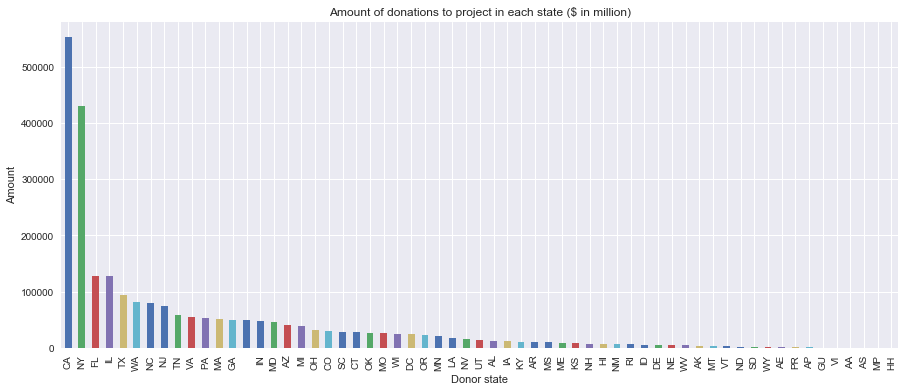

In [20]:
# Plot donation state
fig, ax = plt.subplots(1,1, figsize=(15,6))
ax.grid(linestyle='-')
df['donor_state'].value_counts().plot(kind='bar')
plt.xlabel('Donor state')
plt.ylabel('Amount')
plt.title('Amount of donations to project in each state ($ in million)')
plt.grid(True)

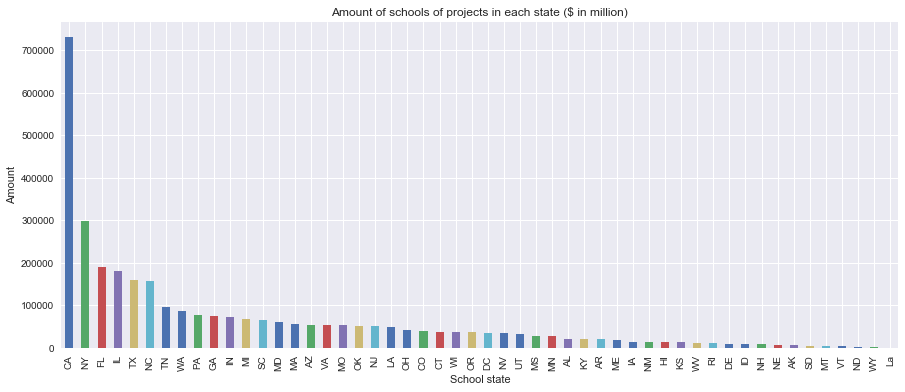

In [21]:
# Plot school state
fig, ax = plt.subplots(1,1, figsize=(15,6))
ax.grid(linestyle='-')
df['school_state'].value_counts().plot(kind='bar')
plt.xlabel('School state')
plt.ylabel('Amount')
plt.title('Amount of schools of projects in each state ($ in million)')
plt.grid(True)

#### There must be something wrong with state category.   'LA' is not a state.  Also, the number of states are more than 50.

### Correlations among numeric variables

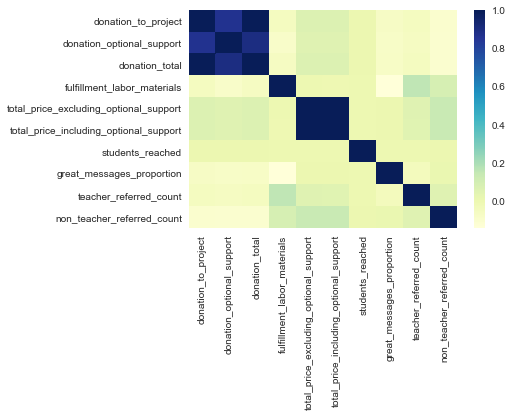

In [22]:
sns.heatmap(df[numeric_var].corr(), cmap="YlGnBu")

### "is_exciting" and numeric variables

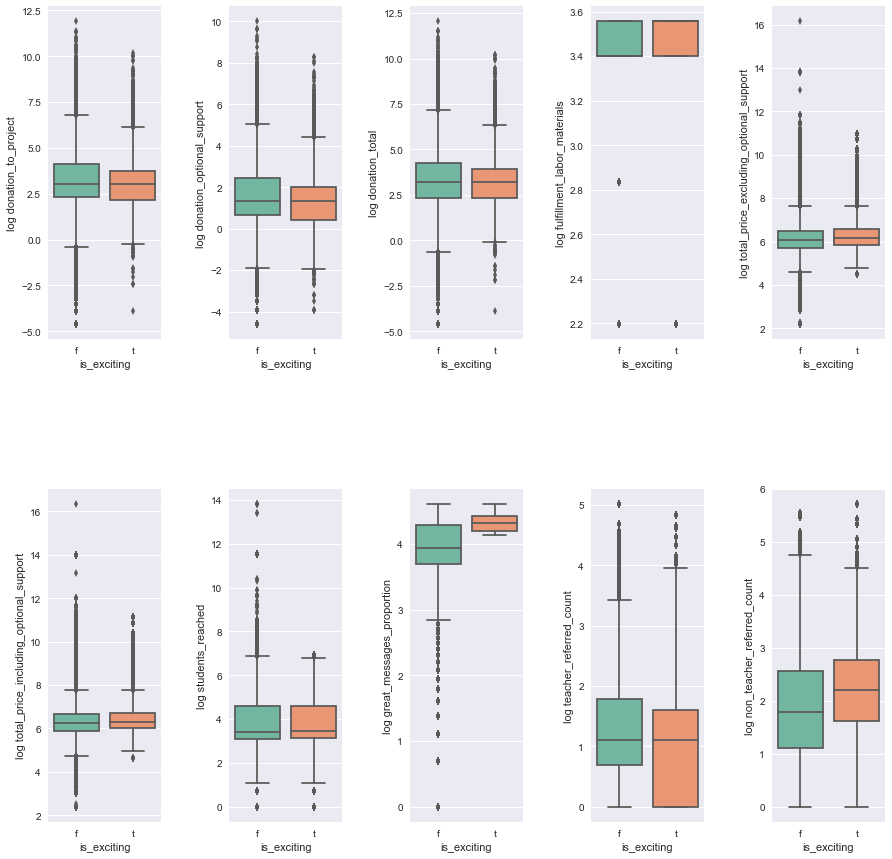

In [23]:
fig, axs = plt.subplots(ncols=5,nrows=2, figsize=(15,15))
fig.subplots_adjust(hspace=0.45, wspace=0.6)
for i in range(2):
    for j in range(5):
        name = numeric_var[i*5+j]
        ax1 = sns.boxplot(x='is_exciting', y=df[name].apply(mathlog), 
                    data=df, palette="Set2",ax=axs[i,j])
        ax1.set_ylabel('log '+name)

### "is_exciting" and categorical variables

In [24]:
def is_exciting_categorical(name):
    fig = plt.subplots(1,1, figsize=(10,3))
    #ax=sns.countplot(x=name, hue='is_exciting', data=df.dropna())
    ax=sns.countplot(x=name, hue='is_exciting', data=df)
    for i in range(0, int(len(ax.patches)/2)):
        h1 = ax.patches[i].get_height()
        h2 = ax.patches[i+int(len(ax.patches)/2)].get_height()
        if h1>0 and h2>0:
            height = h1 + h2
            ax.text(ax.patches[i].get_x()+ax.patches[i].get_width()/2., 
                    h1 + 3, '{:1.2f}'.format(h1/height), ha="center")
            ax.text(ax.patches[i+int(len(ax.patches)/2)].get_x()+ax.patches[i+int(len(ax.patches)/2)].get_width()/2., 
                    h2 + 3, '{:1.2f}'.format(h2/height), ha="center")
    plt.show()        

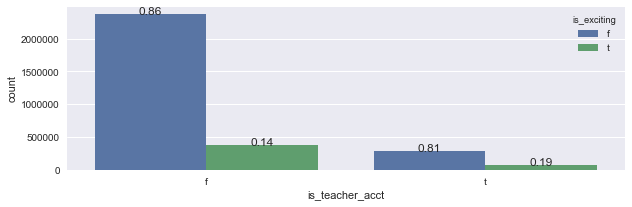

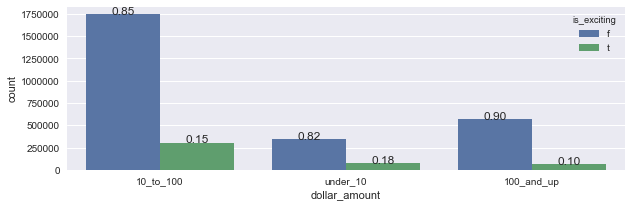

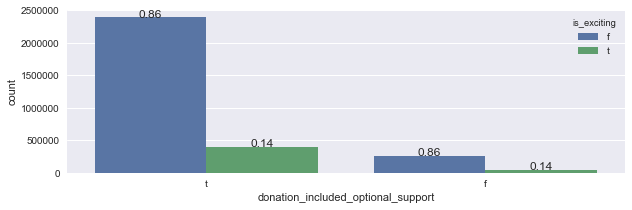

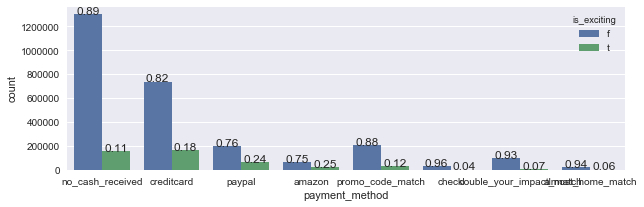

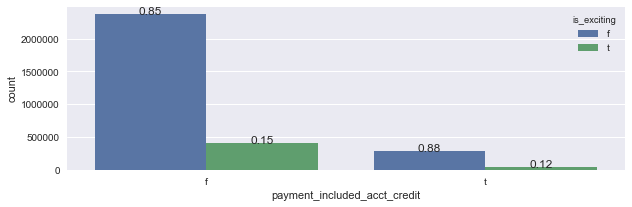

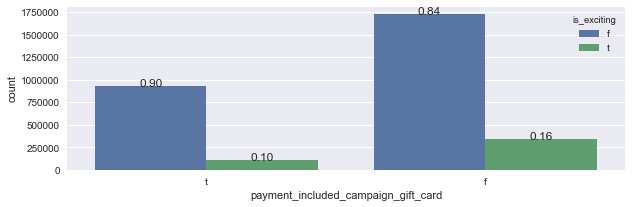

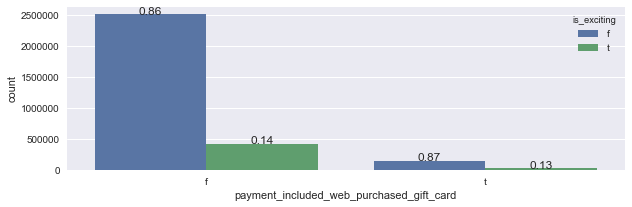

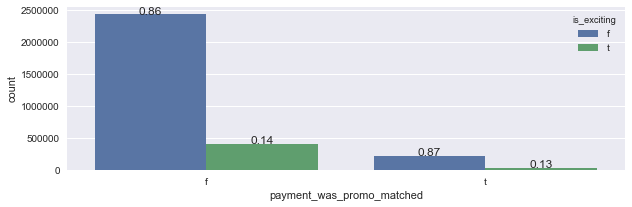

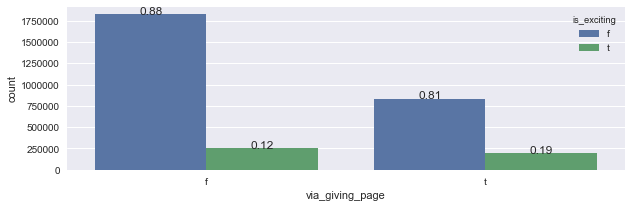

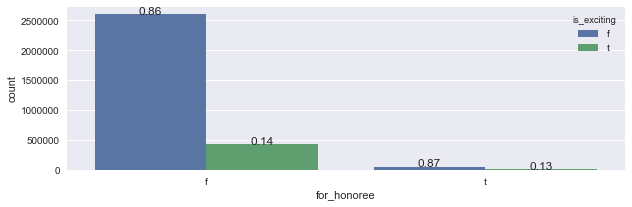

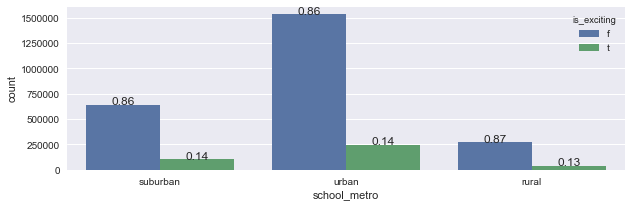

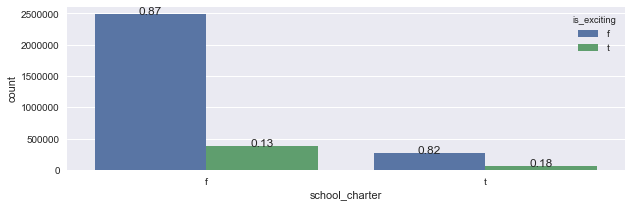

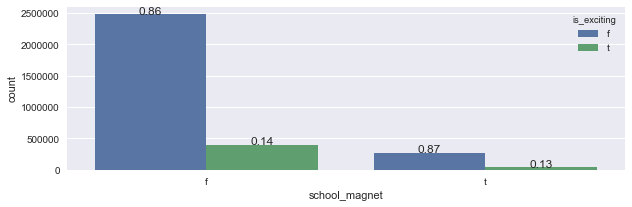

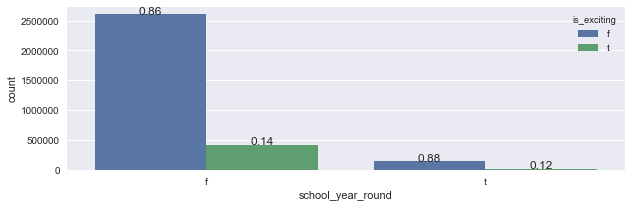

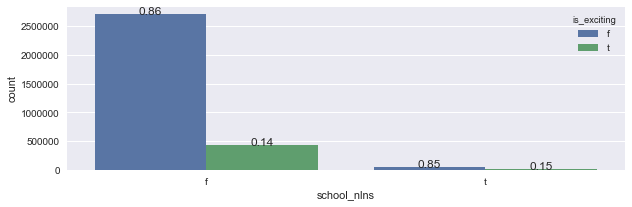

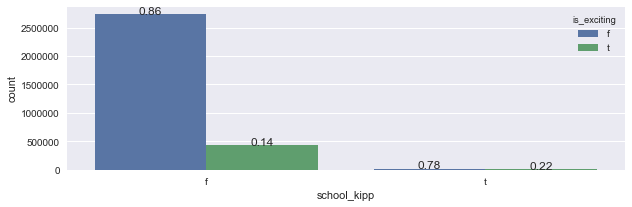

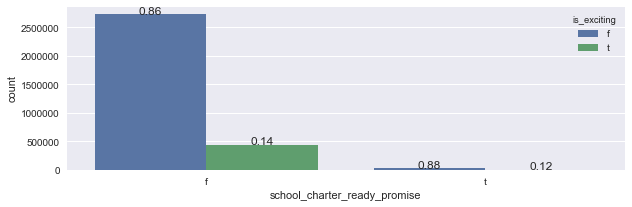

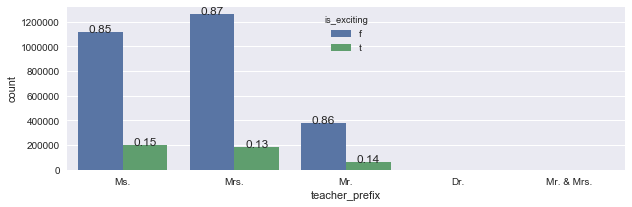

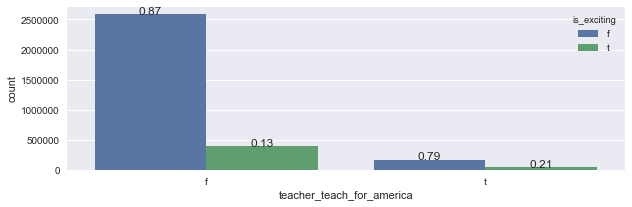

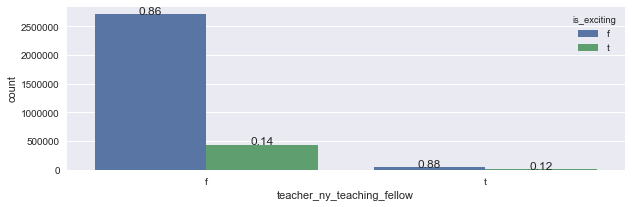

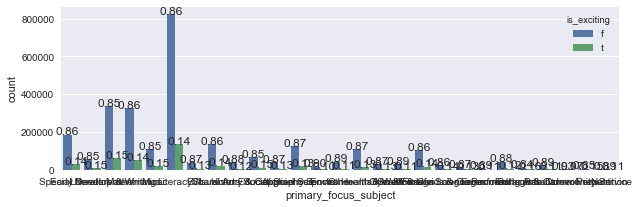

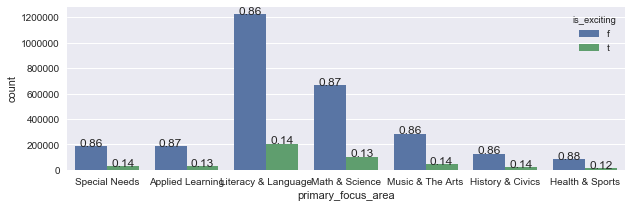

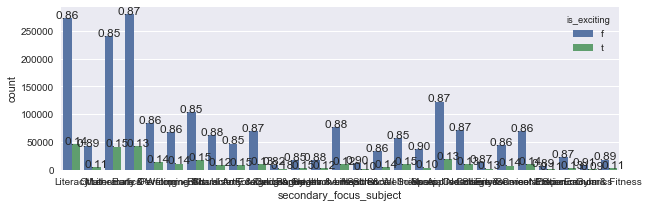

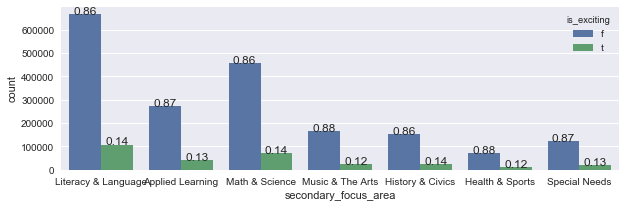

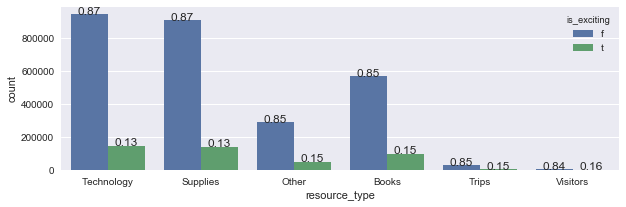

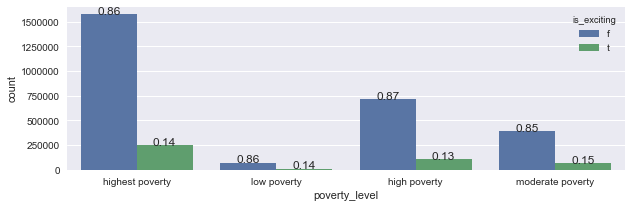

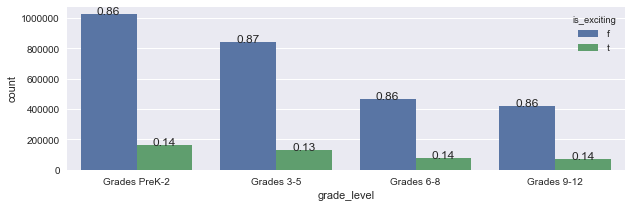

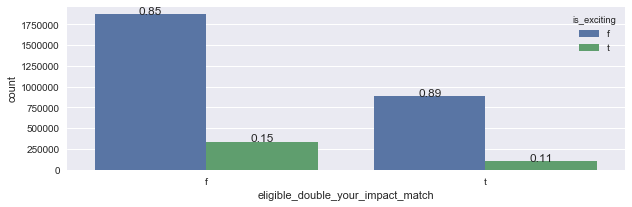

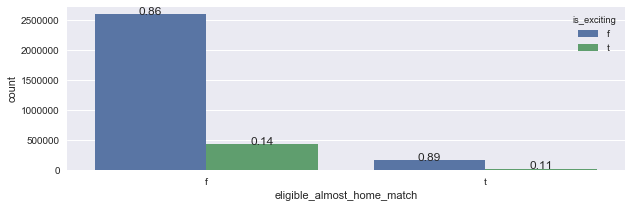

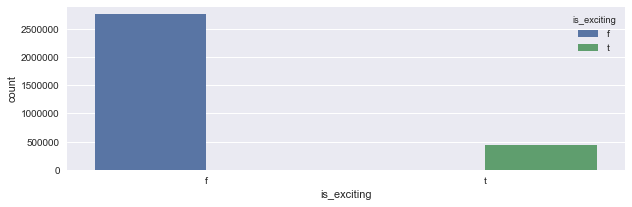

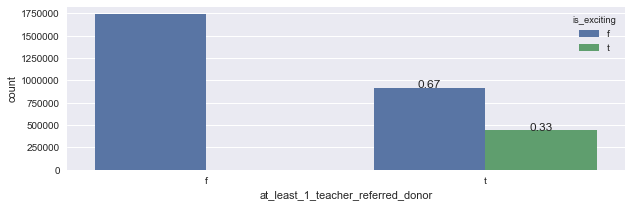

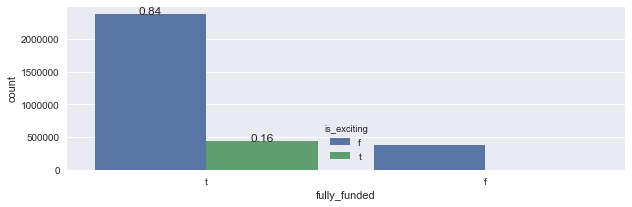

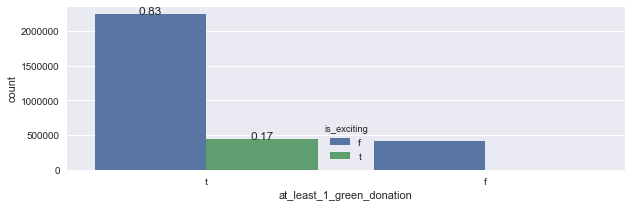

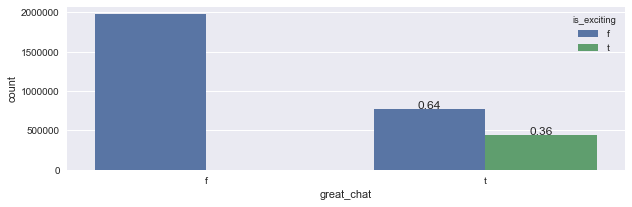

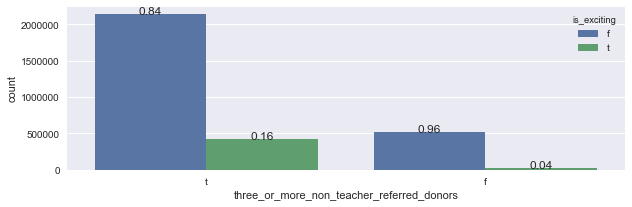

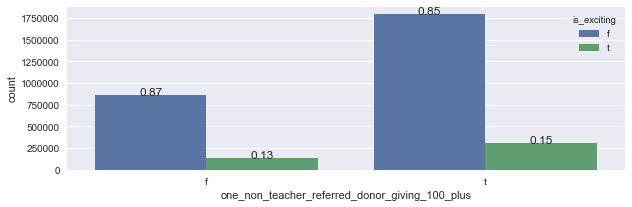

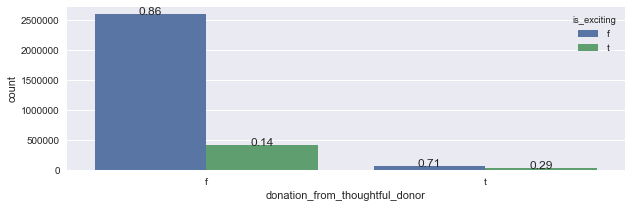

In [25]:
for name in categorical_var:
    is_exciting_categorical(name)

## 2. Data story -- factors relevant to "is_exciting"

#### There are some interesting facts that we obtain from the boxplots of 'is_exciting' and numeric variables above.

* Compared with "not exciting" projects, "excitng" projects have lower amounts of donations('donation_to_project', 'donation_optional_support', 'donation_totoal') and lower variance. While lower variance is reasonale("exciting" projects have much smaller sample), lower amounts are surprising. That is to say, donors donated more to not "exciting" projects than "exciting" projects.  


*  "excitng" projects cost more("total_price_excluding_optional_support" and "total_price_including_optional_support "). It makes intuitive sense because expensive projects might appear to be large and attractive.



* "excitng" projects reach more students, though the difference is not great.



* "excitng" projects have more "great messages"("great_messages_proportion"), fewer donations that are teacher referred("teacher_referred_count") and more donations that are non-teacher referred("non_teacher_referred_count"). It is reasonable because these three variables are critera of being "is_exciting".


 Conclusion:  'donation_to_project', 'donation_optional_support', 'donation_totoal', "total_price_excluding_optional_support" and "total_price_including_optional_support " might be important predictor of excitement.


#### We can learn a lot from the barplots of 'is_exciting' and categorical variables above as well.

For example, the barplot of "is_teacher_acct" shows for each category("f" for False and "t" for True), the proportions of "exciting" projects(0.12, 0.24) and not "exciting" projects(0.88, 0.76). Since the differences are non-trivial(0.12 versus 0.24), it is natural to make a guess that "exciting" projects attracted more teacher donors than not "exciting" projects. That is to say, the variable "is_teacher_acct" is related to excitement.

Similarly, "dollar_amount", "payment_method", "via_giving_page", "school_charter","school_kipp", "teacher_teach_for_america", "teacher_ny_teaching_fellow", "resource_type", "grade_level", "eligible_double_your_impact_match", "eligible_almost_home_match" are potentially significantly related to excitement.

As we know, there are seven criteria of excitement. These variables related to "is_exciting" must be related to one or more criteria variables. For example, we can explore how "great_chat"(a criteron of excitement) is related to "teacher_teach_for_america" by looking at the difference of the proportion of being "great_chat" between projects raised by teachers who are members of "teach for America" and teachers are not. 

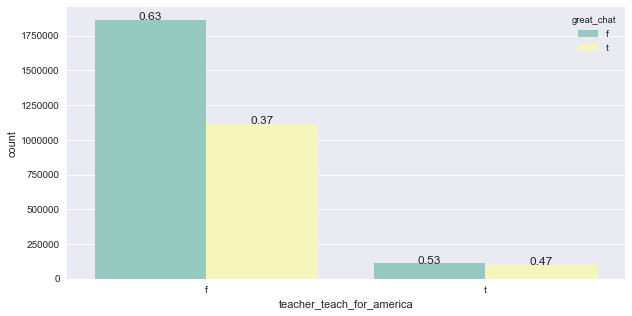

In [26]:
fig = plt.subplots(1,1, figsize=(10,5))
ax=sns.countplot(x="teacher_teach_for_america", hue='great_chat', data=df, palette='Set3')
for i in range(0, int(len(ax.patches)/2)):
    h1 = ax.patches[i].get_height()
    h2 = ax.patches[i+int(len(ax.patches)/2)].get_height()
    height = h1 + h2
    ax.text(ax.patches[i].get_x()+ax.patches[i].get_width()/2., 
            h1 + 3, '{:1.2f}'.format(h1/height), ha="center")
    ax.text(ax.patches[i+int(len(ax.patches)/2)].get_x()+ax.patches[i+int(len(ax.patches)/2)].get_width()/2., 
            h2 + 3, '{:1.2f}'.format(h2/height), ha="center")

The plot above shows that when "teahcer_teach_for_america" is false, the proportion of "exciting" projects is 0.37, much lower than that for "teahcer_teach_for_america" being true(0.47). It indicates that a teacher(creator of a project) being a member of "teach for America" might have positive effect on a project having a comment thread with greater than average unique comments ("great_chat" is true), which helps a project become "exciting".

## 3. Questions for the project partner

What questions would you ask the partner now that you have seen the data? What is missing that you might need to get from them or other data sources to do something useful with the data?

#### Questions about how excitement is determined

Whether the variables mentioned above influence excitement of projects? 
If so, how does it happen? Are there any causal relationships? Do they influence excitement by affecting "fully_fund", "great_message_proportion" and/or other factors? Modeling is required to answer these question(e.g., logistic regression).

#### Questions about the time patterns of donations and project posting.

I plot donation counts and amount for each day from 2001 to 2014. See plots below. 
According to the plots, donations have a time pattern within a year since 2005: donation count and total amount of donations are low during June to August(except 2008). They are very high during October to December, and are high during around Feburary to April. Is this pattern a coincidence?  Does DonorsChoose.org control it on purpose? If not, why?
We find that counts of projects have a similar time pattern as well. 

* Guess: 
Is it because of the semesters and holidays? It is possible that during semesters, more projects are posted, and less projects are posted during holidays. Therefore, there are more donations during semesters than holidays. 

* Derivative guess:
Does the post date of projects influence excitment? Is it possoble that projects posted during the hush time(from October to December) attract more donors and are more likely to be fully funded -- more likely to be 'exciting'.

What is the cause and what is the result? Does the time pattern of projects posted result in the time pattern of donors participation or on the contrary? Or, do the two patterns influence each other? 

To answer these questions, we need to know when a project posted and closed and analyze cumulated amount of donations to each projects over time. 


In [27]:
donations['date'] = donations.donation_timestamp.apply(
                                    lambda x: dt.datetime.strptime(x[:10], "%Y-%m-%d"))

In [28]:
# number of donations for each day
donations.groupby(['date']).date.count().describe()

count     4288.000000
mean       722.478778
std       1280.541749
min          1.000000
25%         20.000000
50%        227.000000
75%        929.750000
max      20174.000000
Name: date, dtype: float64

In [29]:
donations.groupby(['date']).donation_to_project.sum().describe()

count    4.288000e+03
mean     4.764452e+04
std      8.193108e+04
min      1.600000e+01
25%      4.303050e+03
50%      2.072107e+04
75%      6.004689e+04
max      1.557197e+06
Name: donation_to_project, dtype: float64

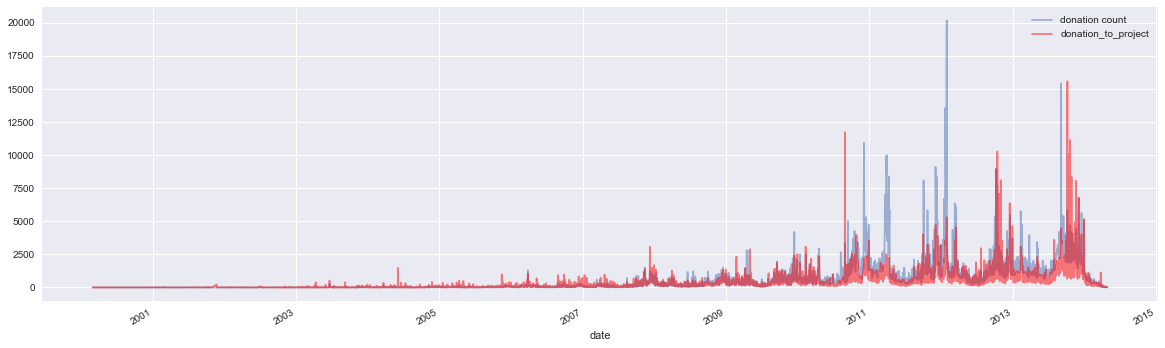

In [30]:
# Count of donations and total amount of donations to projects for each day 
fig, ax = plt.subplots(1,1, figsize=(20,6))
donations.groupby(['date'])['date'].count().plot(label='donation count', alpha=0.5)
(donations.groupby(['date'])['donation_to_project'].sum()/100).plot(color='r', alpha=0.5)

plt.legend()

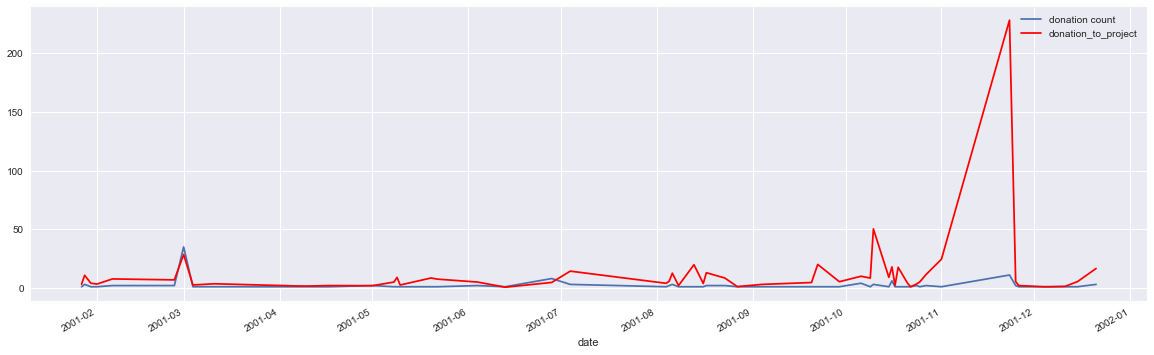

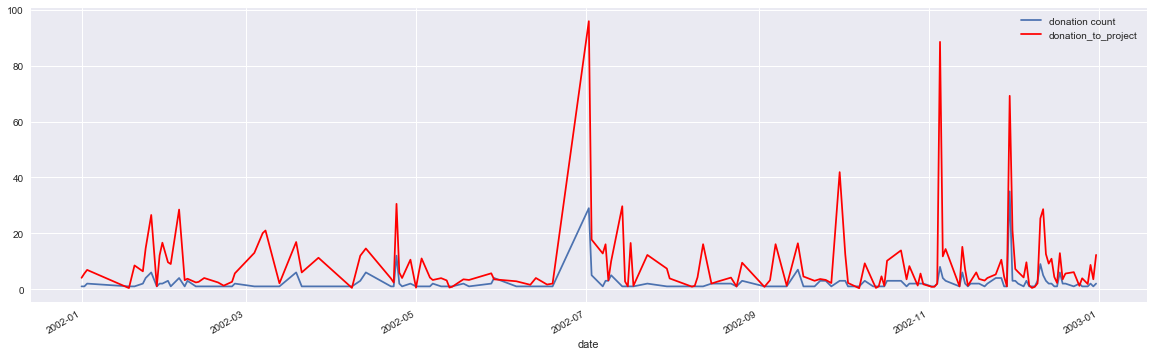

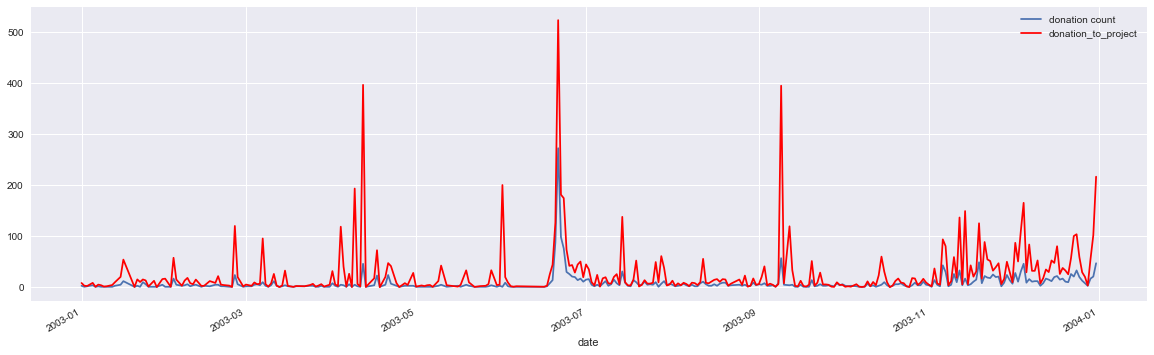

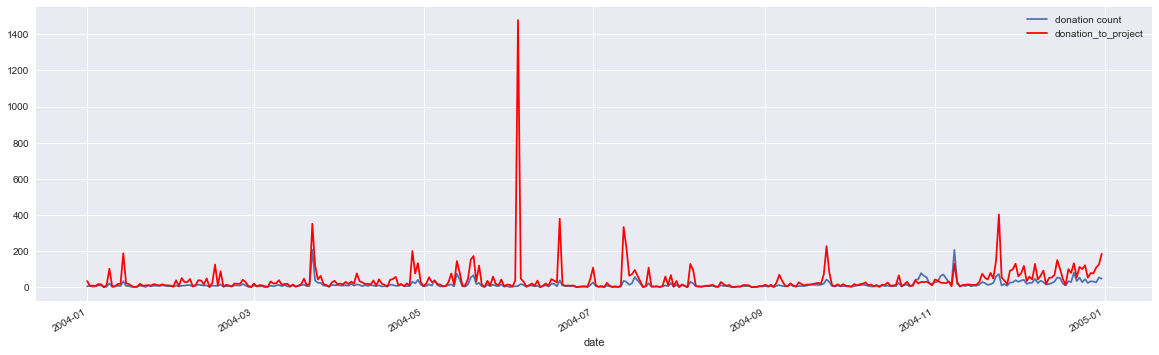

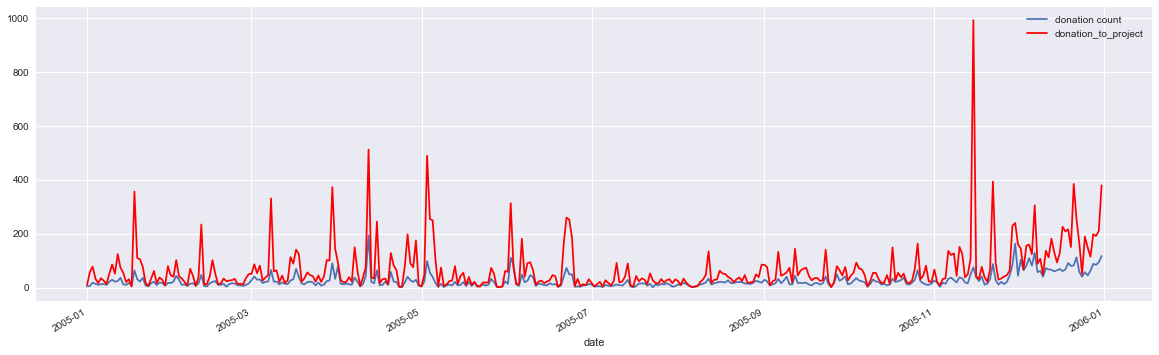

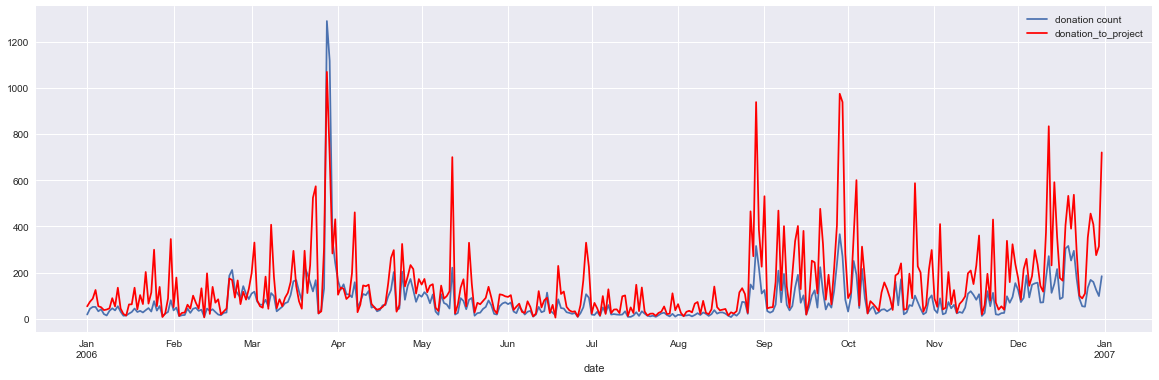

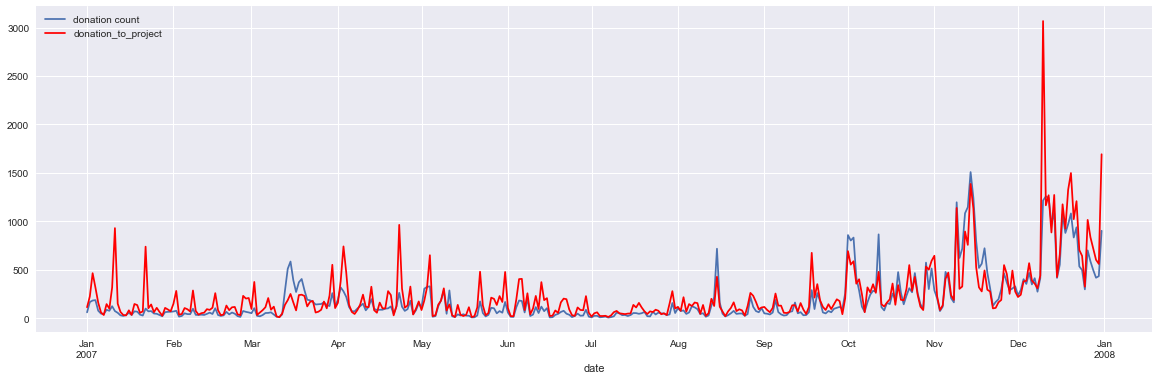

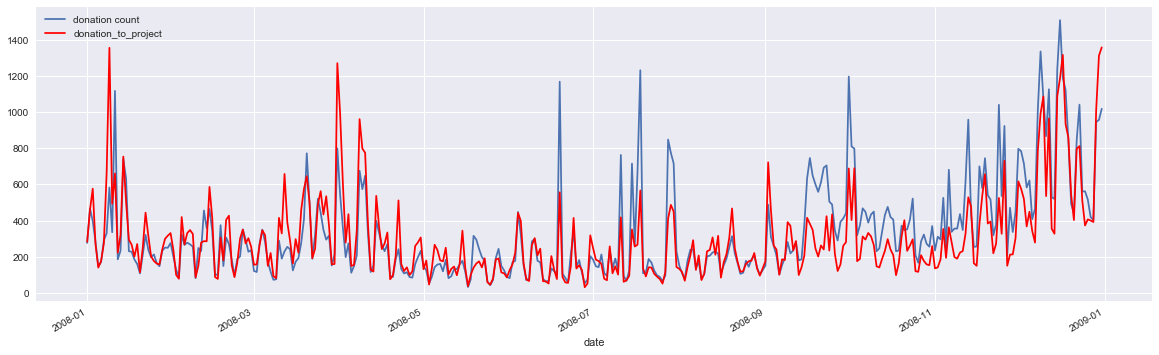

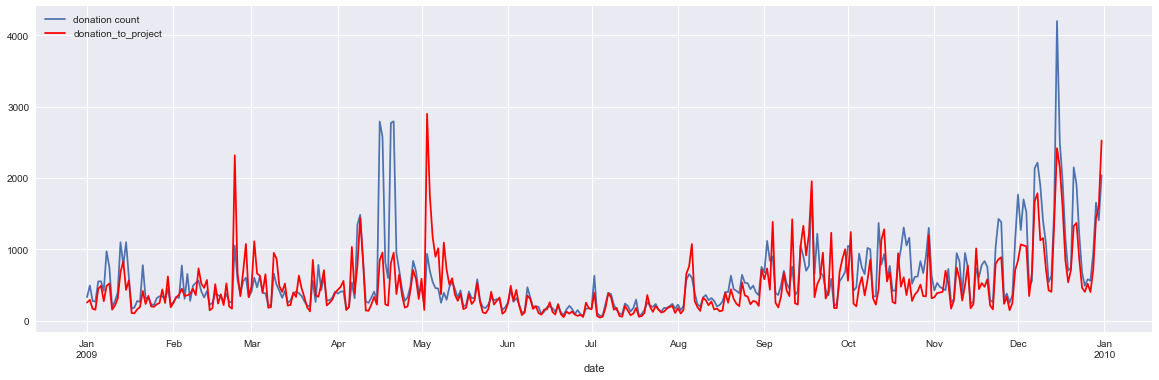

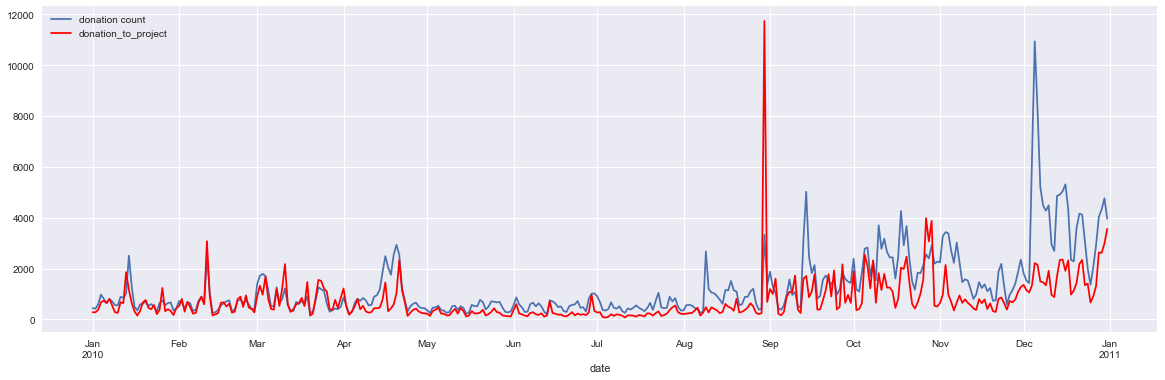

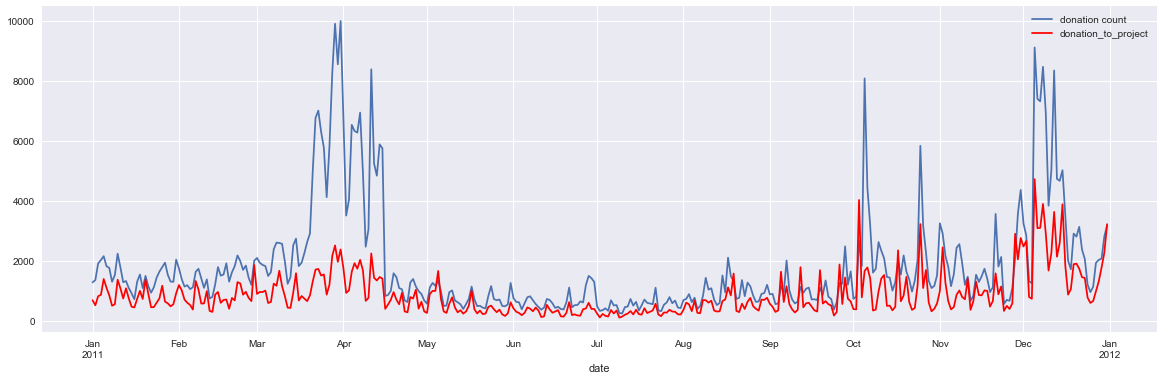

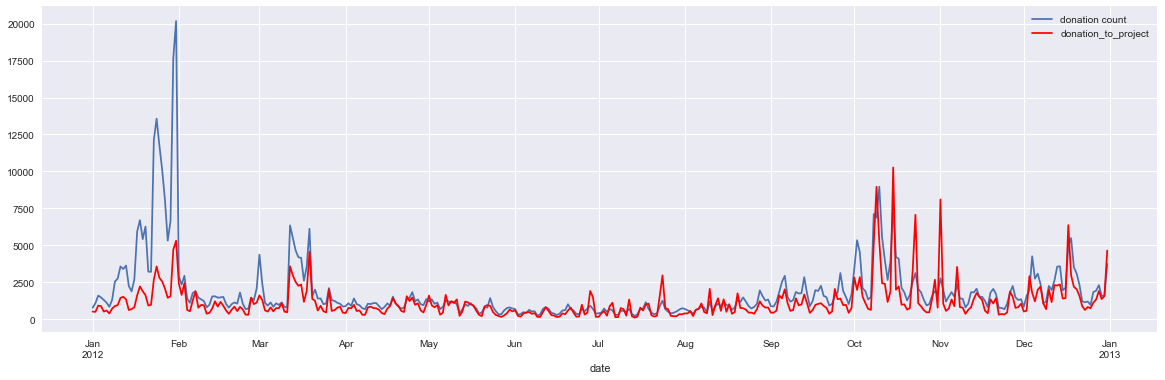

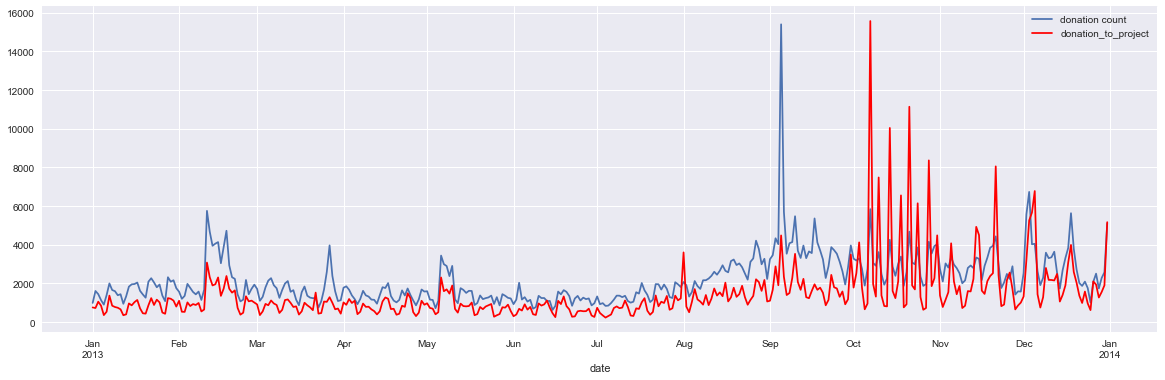

In [31]:
for i in range(2001, 2014):
    fig, ax = plt.subplots(1,1, figsize=(20,6))
    donations.groupby(['date'])['date'].count()['{}-01-01'.format(i):'{}-12-31'.format(i)].plot(label='donation count')
    (donations.groupby(['date'])['donation_to_project'].sum()/100)['{}-01-01'.format(i):'{}-12-31'.format(i)].plot(color='r')
    plt.legend()

In [32]:
projects['date'] = projects['date_posted'].apply(
                                    lambda x: dt.datetime.strptime(x[:10], "%Y-%m-%d"))

In [33]:
projects['date'][0]

Timestamp('2014-05-12 00:00:00')

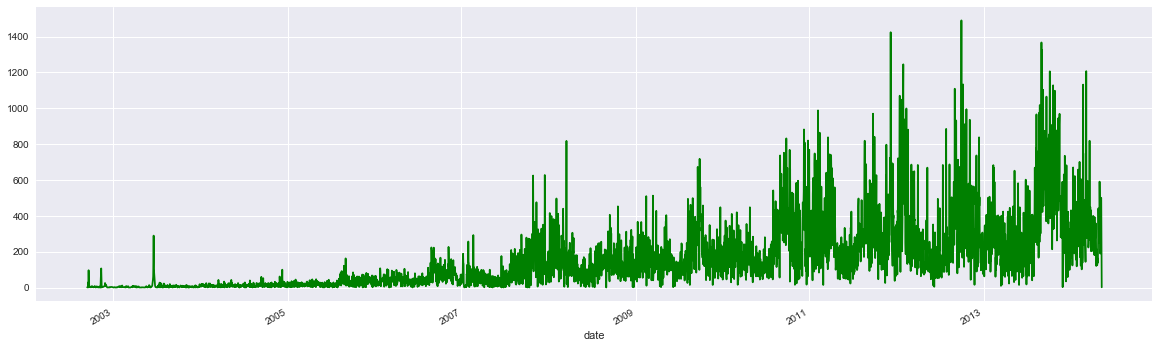

In [34]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
projects.groupby('date')['date'].count().plot(color='green')

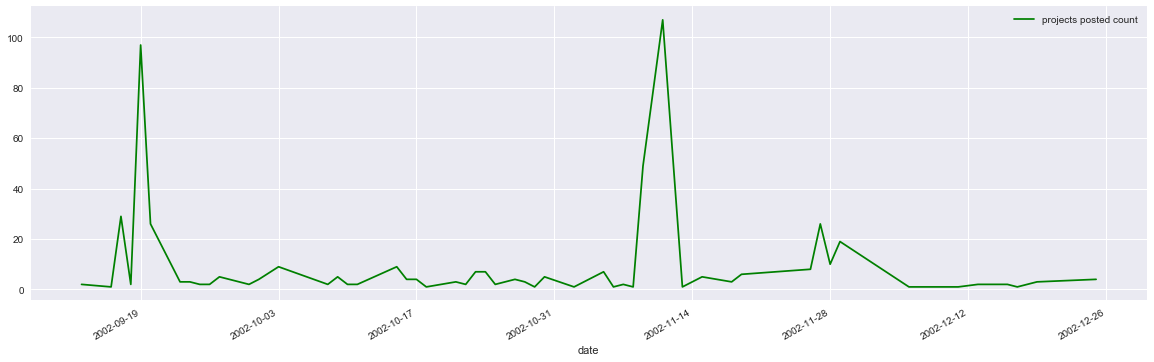

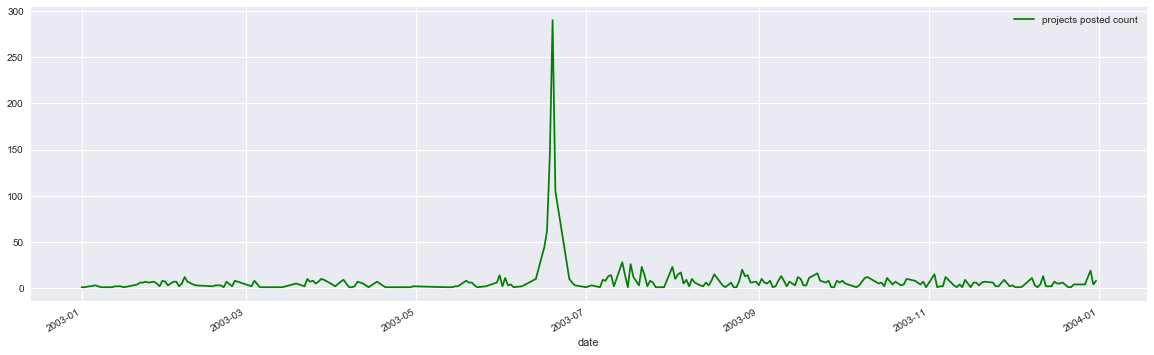

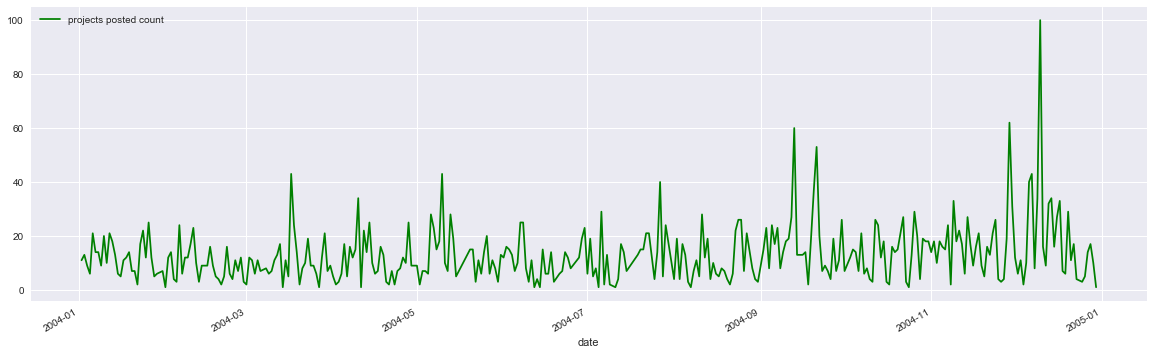

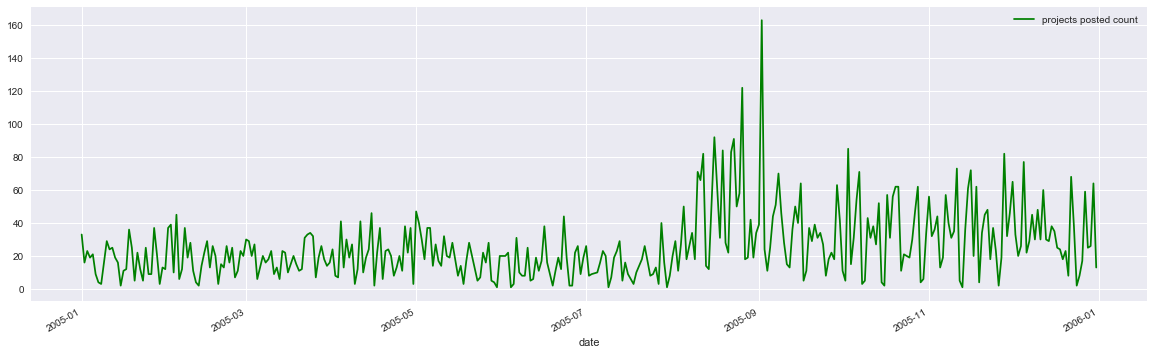

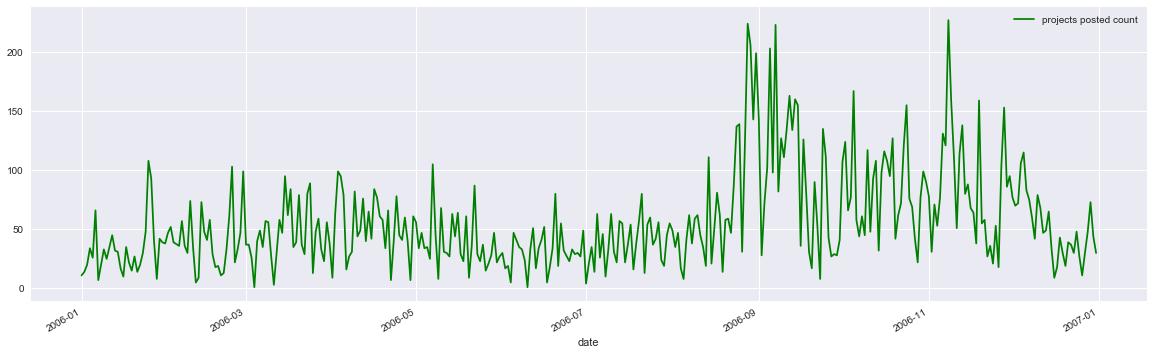

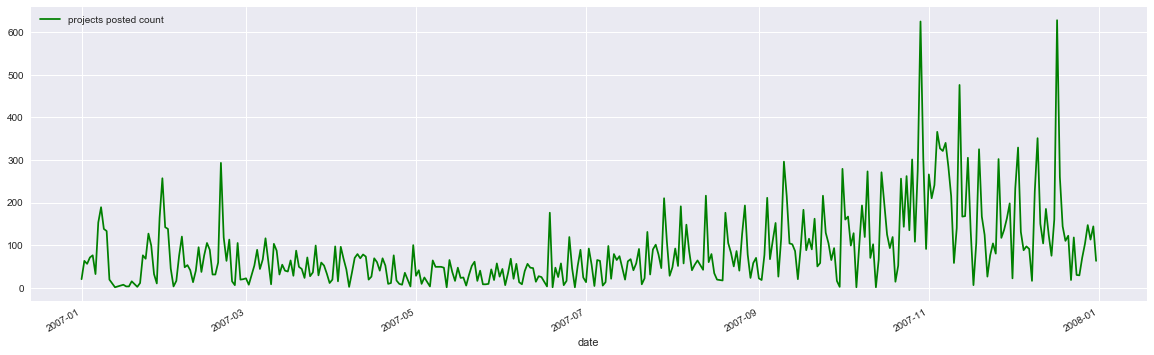

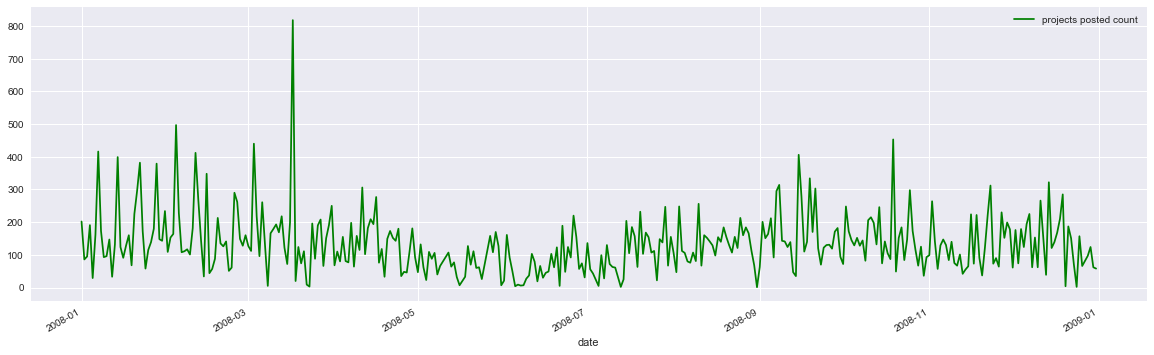

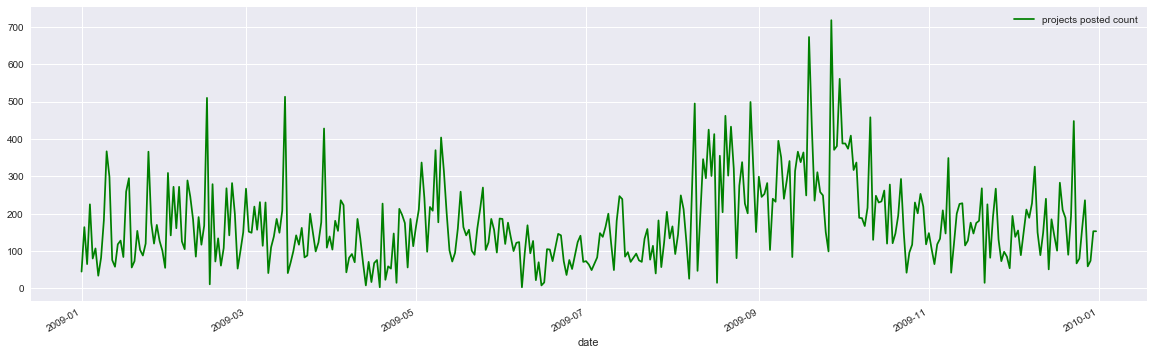

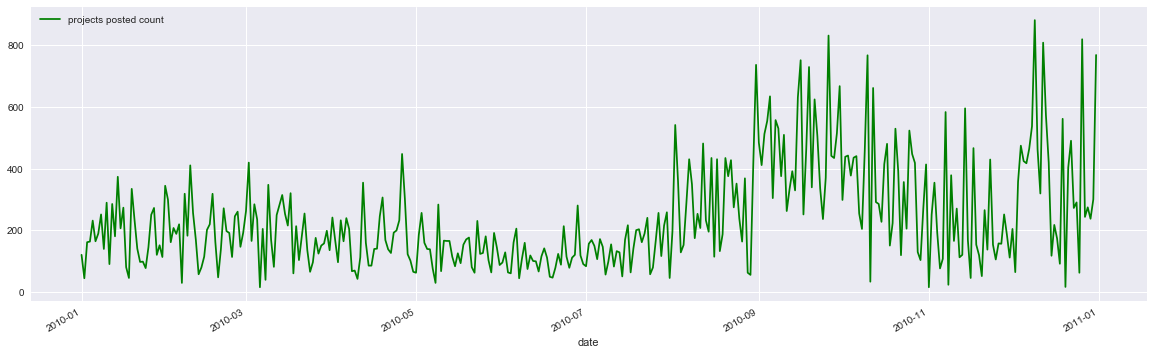

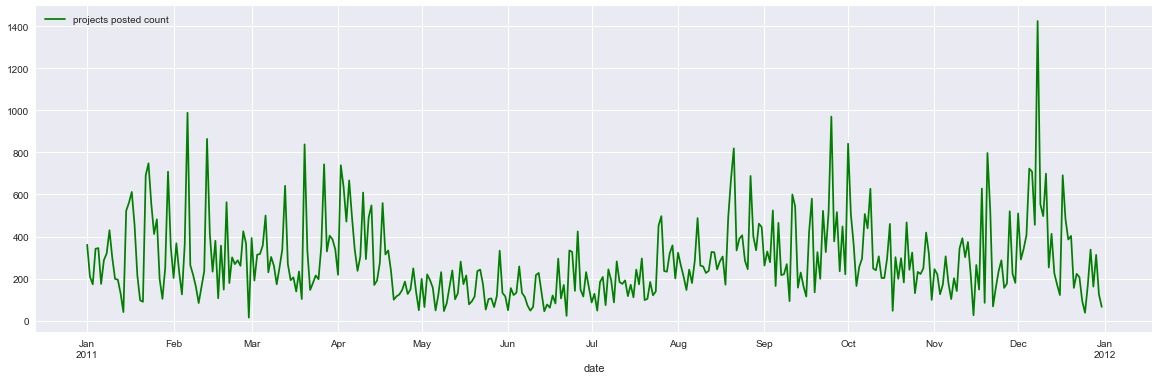

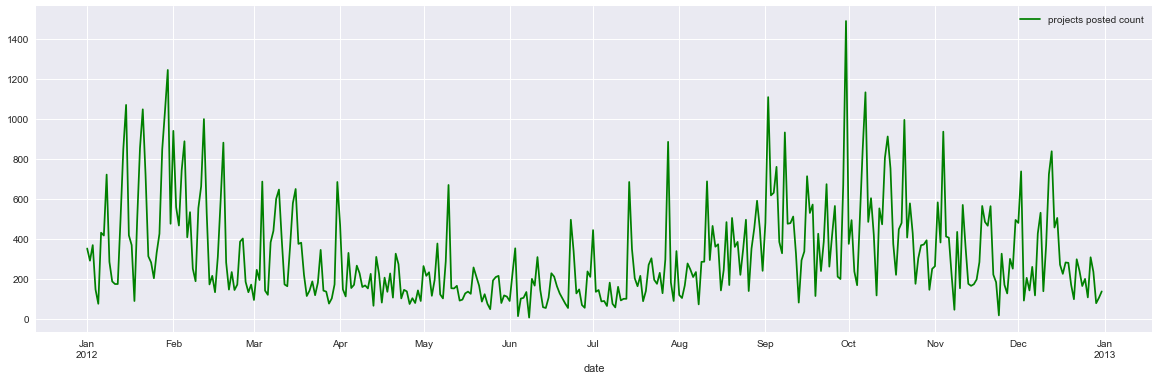

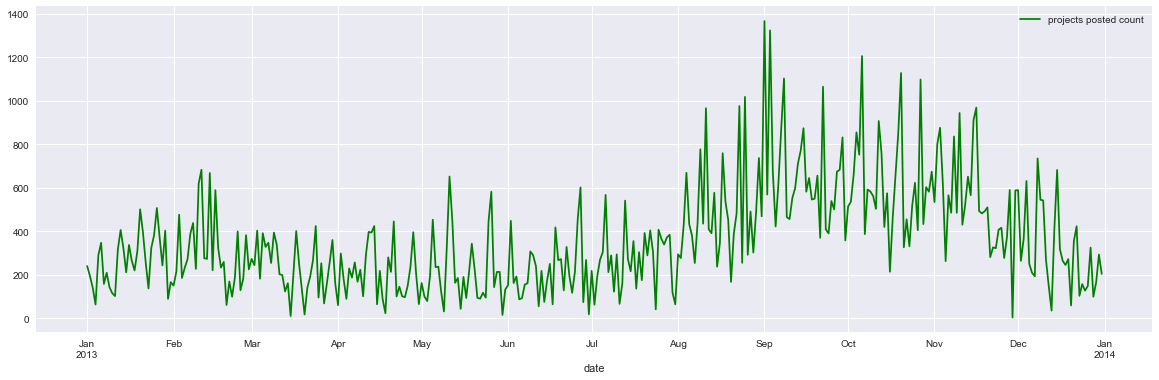

In [35]:
for i in range(2002, 2014):
    fig, ax = plt.subplots(1,1, figsize=(20,6))
    projects.groupby('date')['date'].count()['{}-01-01'.format(i):'{}-12-31'.format(i)].plot(label='projects posted count',color='g')
    plt.legend()